# Regression using Keras

In this task we will design and train a regression model and explore the comfort of working with the high-level API of thee Keras library

In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# set the path to the data
csv_path = r"C:\Users\Kepesidis\Desktop\Deep Learning for Physicists\tutorials\Tutorial 1\winequality-white.csv"
data = pd.read_csv(csv_path, delimiter=";")

In [54]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [55]:
# Split the data into train and test sets

data_np = data.values # transform to numpy array

np.random.shuffle(data_np) # randomly shaffle data

# use first 3000 examples for training
X_train = data_np[:3000,:11] # predictors
y_train = data_np[:3000,11]  # target variable

# and remaining examples for testing
X_test = data_np[3000:,:11] # predictors
y_test = data_np[3000:,11] # target variable

In [56]:
X_test.shape

(1898, 11)

Below is a simple network implemented using Keras. In addition to the network we define the loss function and optimiser. We can use the Sequential class to very easiliy build a simple architecture. For more information on Keras, see: https://keras.io/api/models/sequential/ and https://keras.io/api/layers/core_layers/dense/

In [83]:
# See: https://keras.io/api/models/sequential/ and 
# https://keras.io/api/layers/core_layers/dense/
# We can use the Sequential class to very easiliy
# build a simple architecture
model = keras.models.Sequential()
# 11 inputs, 20 outputs, relu
model.add(keras.layers.Dense(20, input_dim=11, activation='relu')) 
model.add(keras.layers.Dense(20, activation='relu')) 
#model.add(keras.layers.Dense(20, activation='relu')) 
# 20 inputs (automatically detected by Keras), 1 output, linear activation
model.add(keras.layers.Dense(1, activation='linear'))


# Set loss function and optimiser algorithm
# Remove comments from of these versions:

# Initial:
#model.compile(loss='mse',  # mean squared error
#              optimizer='sgd'# stochastic gradient descent
#             ) 
#
# sgd with mometum
# instead of passing a string, we can explicitely construct the optimizer object
# this gives us more control over its properties
#opt = keras.optimizers.SGD(momentum=0.8) 
#model.compile(loss='mse',  # mean squared error
#              optimizer='sgd'
#             ) 
#
# Adam:
opt = keras.optimizers.Adam(learning_rate=0.0005) 
model.compile(loss='mse',  # mean squared error
              optimizer=opt
             ) 

### Model training and evaluation

The code below trains the network for 5 epochs using the loss function and optimiser defined above. Each example is individually passed to the network

In [89]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=10, batch_size=64)

Epoch 1/10
47/47 [==============================] - 0s 1ms/step - loss: 0.5924 - val_loss: 0.6233
Epoch 2/10
47/47 [==============================] - 0s 870us/step - loss: 0.5938 - val_loss: 0.6226
Epoch 3/10
47/47 [==============================] - 0s 844us/step - loss: 0.5939 - val_loss: 0.6186
Epoch 4/10
47/47 [==============================] - 0s 712us/step - loss: 0.5902 - val_loss: 0.6236
Epoch 5/10
47/47 [==============================] - 0s 799us/step - loss: 0.5941 - val_loss: 0.6175
Epoch 6/10
47/47 [==============================] - 0s 777us/step - loss: 0.5881 - val_loss: 0.6188
Epoch 7/10
47/47 [==============================] - 0s 842us/step - loss: 0.6001 - val_loss: 0.6161
Epoch 8/10
47/47 [==============================] - 0s 820us/step - loss: 0.5922 - val_loss: 0.6142
Epoch 9/10
47/47 [==============================] - 0s 799us/step - loss: 0.5875 - val_loss: 0.6217
Epoch 10/10
47/47 [==============================] - 0s 797us/step - loss: 0.5916 - val_loss: 0.6825


The history object returned by the model training above contains the values of the loss function (the mean-squared-error) at different epochs. We discard the first epoch as the loss value is very high, obscuring the rest of the distribution

In [90]:
train_loss = history.history["loss"][1:]
test_loss = history.history["val_loss"][1:]

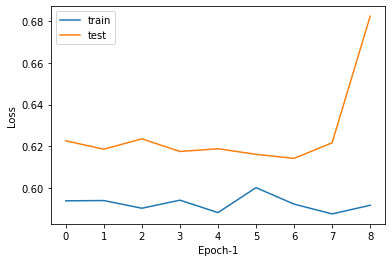

In [91]:
# Prepare and plot loss over time
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.legend()
plt.xlabel("Epoch-1")
plt.ylabel("Loss")
plt.show()

Correlation coefficient: 0.49419177800677894


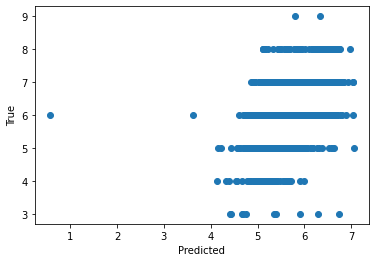

In [92]:
# After the training:

# Prepare scatter plot
y_pred = model.predict(X_test)[:,0]

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [93]:
np.corrcoef(y_pred,y_test)

array([[1.        , 0.49419178],
       [0.49419178, 1.        ]])